In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

preprocess the dataset

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Create a model

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\hemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3702 - loss: 1.7265
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5901 - loss: 1.1734
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6446 - loss: 1.0182
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6773 - loss: 0.9187
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7002 - loss: 0.8542
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7177 - loss: 0.8106
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7322 - loss: 0.7721
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7486 - loss: 0.7189
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7665 - loss: 0.6719
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7761 - loss: 0.6430


In [16]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6914 - loss: 0.9230


[0.9278351664543152, 0.6863999962806702]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.92956061e-03, 4.54139692e-04, 1.77968774e-04, 8.97749484e-01,
        1.02707047e-04, 7.71459043e-02, 7.93507136e-03, 1.14177885e-04,
        1.06902588e-02, 2.70079728e-03],
       [4.95567801e-04, 8.53693113e-03, 7.08440393e-06, 1.98380661e-07,
        6.88710202e-07, 2.84241452e-07, 5.62662850e-09, 2.00511892e-07,
        9.90507364e-01, 4.51617438e-04],
       [7.48599321e-02, 7.72053823e-02, 1.93734397e-03, 3.88491666e-03,
        1.49884424e-03, 1.57695170e-03, 2.69477634e-04, 2.64279149e-03,
        8.17376018e-01, 1.87484436e-02],
       [9.44132864e-01, 4.32725670e-03, 1.56717859e-02, 8.75064929e-04,
        1.48624768e-02, 1.00574412e-04, 7.39227326e-05, 9.44271975e-04,
        1.85839254e-02, 4.27862746e-04],
       [1.41554537e-07, 2.21601640e-05, 4.79350565e-03, 1.91856381e-02,
        8.50202560e-01, 1.48186332e-03, 1.24310888e-01, 3.92067221e-07,
        2.82235897e-06, 1.16031700e-08]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

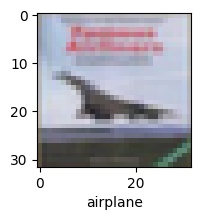

In [22]:
plot_sample(X_test, y_test,3)

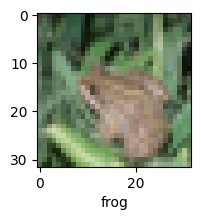

In [23]:
plot_sample(X_test, y_test,4)

In [25]:
classes[y_classes[3]]

'airplane'

In [26]:
classes[y_classes[0]]

'cat'

In [28]:
classes[y_classes[7]]

'frog'